#  🔹 STEP 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 🔹 STEP 2: Upload and Load Dataset (in Google Colab)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Supermart_Grocery_Sales.csv to Cleaned_Supermart_Grocery_Sales.csv


In [ ]:
df = pd.read_csv('Cleaned_Supermart_Grocery_Sales.csv')
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,month_no,Month,year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,11,9,2017
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,11,9,2017
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,6,6,2017
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,10,10,2016
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,10,10,2016


# 🔹 STEP 3: Check Dataset Info

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   int64  
 3   Sub Category   9994 non-null   int64  
 4   City           9994 non-null   int64  
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   int64  
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   int64  
 11  Order Day      9994 non-null   int64  
 12  month_no       9994 non-null   int64  
 13  Month          9994 non-null   int64  
 14  year           9994 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


#🔹 STEP 4: Exploratory Data Analysis (EDA)

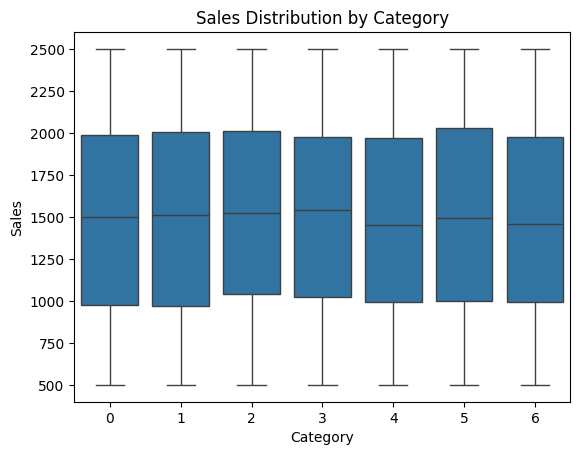

In [ ]:
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.show()


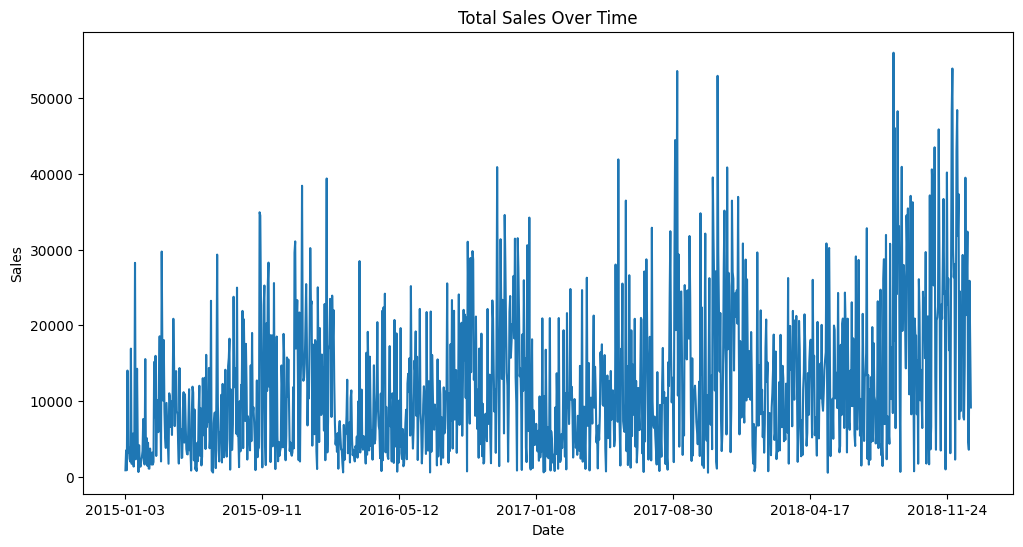

In [ ]:
df.groupby('Order Date')['Sales'].sum().plot(figsize=(12,6))
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


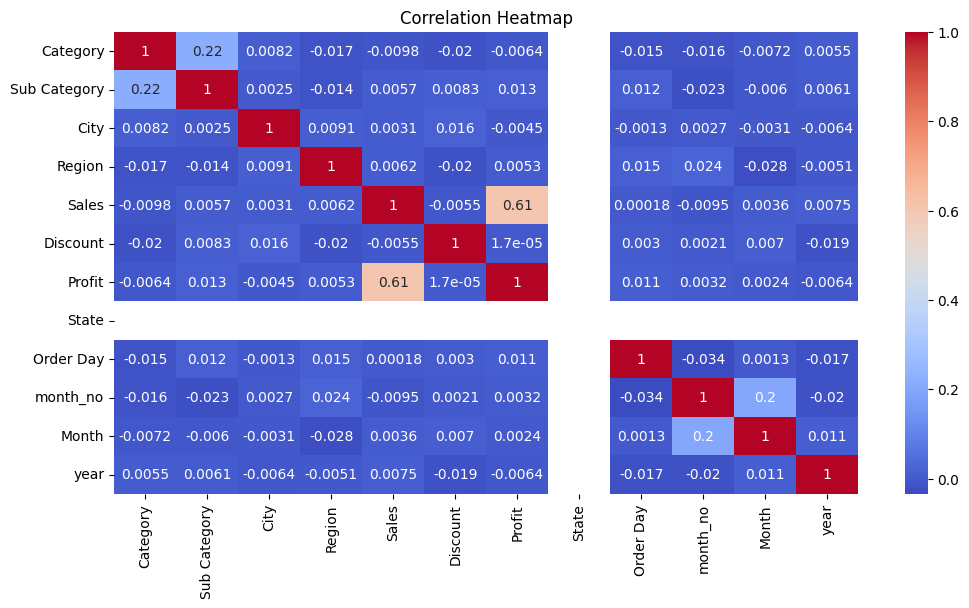

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 🔹 STEP 5: Feature Selection

In [ ]:
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']


# 🔹 STEP 6: Train-Test Split

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔹 STEP 7: Scale the Features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 🔹 STEP 8:Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# 🔹 STEP 9:Evaluate the Model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 212935.59126695254
R-squared Score: 0.3543818382962983


# 🔹 STEP 10:Visualize Predictions

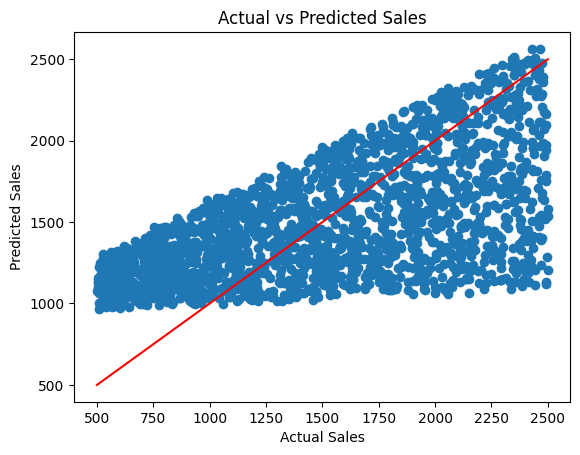

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
